In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
from scipy.integrate import quad
import seaborn as sns

In [111]:
%matplotlib inline

# Часть 1

Введу обозначения: <br> $А$ - событие,  являться убийцей; <br> 
$В$ - событие,  иметь  "особую"  группу  крови.

## № 1

$P(B| \overline{A}) = 1$% <br>
$1 - P(B| \overline{A}) = P(\overline{B}| \overline{A}) = 99\%$ - то, что сказал прокурор ( вероятноcть не иметь особую группу крови при условии, что человек невиновен). А должен был оценить вероятность быть убийцей при условии, что имеет особую группу крови

## № 2

Адвокат оценил $P(A|B)$ (вероятность быть убийцей если у человека особая группа крови) и заявил, что подсудимого необходимо убрать из дела. ЧТо неверно, так как явно он является подсудимым не просто так и есть другие поводы считать его виновным (он не случайный человек с улицы). Поэтому адвока должен был оценить $P(A|B\ и\ другие\ улики)$, чтобы вносить предложение об оправдании подсудимого.

## № 3

Событие $A$ - болен <br>
Событие $B$ - положительный тест

$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$ 

$P(B|A) - TruePositive$ <br>
$P(\overline{B}|A) - FalseNegative$ <br>
$TP + FN = 1$ (сумма вероятностей исходов, если человек здоров)

$P(B|\overline(A)) - FalsePositive$ <br>
$P(\overline(B)|\overline(A)) - TrueNegative$ <br>
$FP + TN = 1$

И еще:
$P(B) = P(B|A)P(A) + P(B|\overline{A})P(\overline{A})$ (полная вероятность) <br>
То есть $P(A|B) = \frac{P(B|A)*P(A)}{P(B|A)P(A) + P(B|\overline{A})P(\overline{A})}$

Тогда для вероятности $P(A|\overline{B})$ то же самое, только над $B$ теперь крышечка

Меняя $FN$ и $FP$ мы меняем вероятности ошибок теста при различных состояниях человека. Теперь при разных состояниях здоровья человека вероятности ошибок будут различны, а не оба по 5%.

In [112]:
PA = 0.01 # вероятность быть больным

### вероятность быть больным при положительном тесте

Изначально она равна $16.1\%$

In [113]:
#от FalseNegative
def p1(x):
    return (1 - x) * PA / ( (1 - x) * PA + 0.05 * (1 - PA))
    

In [114]:
x_arr = np.linspace(0, 1, 1000)

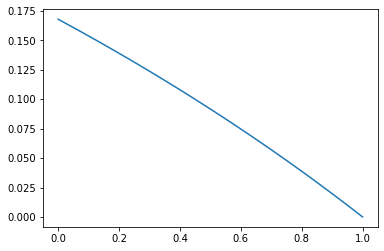

In [115]:
plt.plot(x_arr, p1(x_arr))

In [116]:
#от falsePositive
def p2(x):
    return 0.95 * PA / (0.95 * PA + x * (1 - PA))

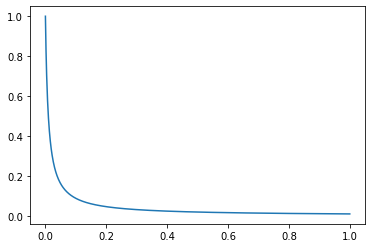

In [117]:
plt.plot(x_arr, p2(x_arr))

следовательно выгоднее понижать FalsePositive

In [118]:
p1(0)

0.1680672268907563

In [119]:
p2(0)

1.0

Можем видеть заметный прирост вероятности в нужную сторону при понижении $FP$

### вероятность быть больным при отрицательном тесте

In [120]:
#от FalseNegative
def p3(x):
    return x * PA / (x * PA + 0.95 * (1 - PA))

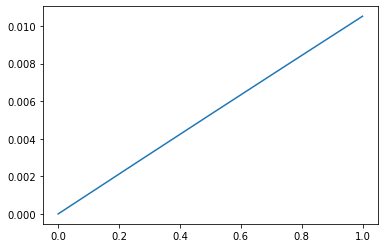

In [121]:
plt.plot(x_arr, p3(x_arr))

In [122]:
#от falsePositive
def p4(x):
    return 0.05 * PA / (0.05 * PA + (1 - x) * (1 - PA))

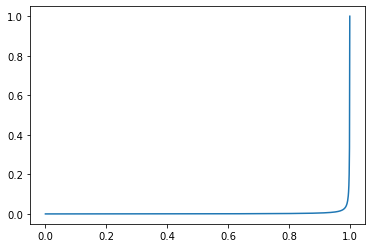

In [123]:
plt.plot(x_arr, p4(x_arr))

In [124]:
p4(0.05)

0.0005313496280552604

В этом случае выгоднее понижать $FN$, так как значения будут уменьшаться быстрее, чем при понижении $FP$ (производная больше в области нуля ($x <= 0.05$))

In [125]:
p4(0)

0.0005047955577990914

In [126]:
p3(0)

0.0

## Итог

В итоге выгоднее понижать FalsePositive, так как это даст заметный прирост к такой велечине "Вероятность быть больным при положительном тесте" и небольшую убыль вероятности быть больным при отрицательном тесте (можно сказать незаметную).
Вторая величина и так очень маленькая (порядка 0.05 процента) (Поэтому мало смысла стремиться ещё её понизить, хоть она и очень важна, чтобы сохранить жизни людей, ибо лучше лечить здорового, чем не лечить больного). Но при этом будет (намного) меньше случаев, когда врачи будут лечить здорового человека (фактически тратить ресурсы зря).

# Часть 2

## 1 - подготовка данных


можно просто понажимать alt + enter до следующей части

In [127]:
df = pd.read_csv('data.csv')

In [128]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [129]:
df = df[df['location'] == 'Russia']

In [130]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
51642,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
51643,RUS,Europe,Russia,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
51644,RUS,Europe,Russia,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
51645,RUS,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
51646,RUS,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [131]:
df = df[['date', 'total_cases', 'new_cases']]

In [132]:
df = df.reset_index()

In [133]:
del df['index']

In [134]:
df[df['date'] ==  '2020-03-01']

,date,total_cases,new_cases
30,2020-03-01,2.0,0.0


In [135]:
df = df.iloc[30::]

In [136]:
df = df.reset_index()

In [137]:
del df['index']

In [138]:
df.head()

,date,total_cases,new_cases
0,2020-03-01,2.0,0.0
1,2020-03-02,3.0,1.0
2,2020-03-03,3.0,0.0
3,2020-03-04,3.0,0.0
4,2020-03-05,4.0,1.0


In [139]:
train = df.iloc[0:50]
test = df.iloc[50::]
train = train.reset_index()
test = test.reset_index()

## 2

$ln(y) = w0 + w1t + \epsilon$ <br>
$\epsilon = Norm(0, \sigma ^2)$

In [140]:
X_train = np.array(train['index']).reshape((-1, 1))
y_train = np.log(np.array(train['total_cases']).reshape((-1, 1)))

In [141]:
# маленькое lambda, чтобы было широкое априорное распределение
lambd = 0.01

In [142]:
#обучим модель лин. регрессии
model = Ridge(alpha=lambd)
model.fit(X_train, y_train)

Ridge(alpha=0.01)

Обучая данную модель мы будем максимизировать апостериорное распределение (искать веса, соответствующие максимуму) <br>
стоит учесть, что $\lambda = \frac{\sigma^2}{\alpha}$ <br>
Выбрал $\lambda$ меньше, чтобы расширить априорное распределение

Априорное распределение выбирается многомерным нормальным со средним вектором $\mu = 0$ и матрицей ковариации $\alpha I$

$Loss = MSE(y, \hat{y}) + \lambda w^T w$ - оптимизируем

Естественно, $y$ и $\hat{y}$ уже в логарифмированной шкале. $y = ln(real\_y)$

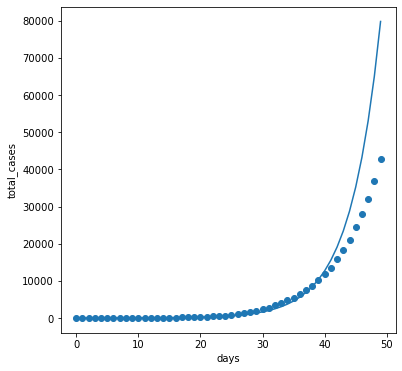

In [143]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_train, np.exp(y_train))
ax.plot(X_train, np.exp(model.predict(X_train)))
ax.set_xlabel('days')
ax.set_ylabel('total_cases')
plt.show()

In [144]:
#оценка стандартного отклонения
sigma = np.std(y_train - model.predict(X_train))

In [145]:
sigma

0.3391199942424987

In [146]:
#коэффициент перед матрицей ковариаций априорного распределения параметра модели
alpha = sigma**2 / lambd

In [147]:
alpha

11.500237049503237

из лекции апостериорное распределение: <br>
$p(w|D) = Norm(mean, cov\ matrix)$ при условии, что априорное распределение тоже выбрано нормальным (многомерным)


In [148]:
X = np.hstack((np.ones(X_train.shape), X_train))

In [149]:
#параметры апостериорного распределения
apost_covm = np.linalg.inv(np.eye(2) / alpha + X.T@X / sigma**2)
apost_mean = apost_covm @ X.T @ y_train / sigma**2

Посемплируем веса модели из полученного распределения и посмотрим на результат

In [150]:
SAMPL = 1000

In [151]:
#сэмплы весов модели в соответствии с апостериорным распределением
tst = []
for i in range(SAMPL):
    tst.append(np.random.multivariate_normal(mean=apost_mean.reshape(-1), cov=apost_covm))

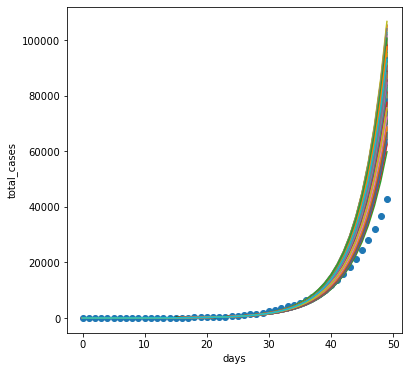

In [152]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('days')
ax.set_ylabel('total_cases')
ax.scatter(X_train, np.exp(y_train))
for i in range(SAMPL):
    ax.plot(X_train, np.exp(X@tst[i].reshape((-1,1))))
plt.show()

In [153]:
#посмотрим, что будет в следущие 50 дней
X_test = np.array(test.iloc[0:50]['index']).reshape((-1, 1))
y_test = np.array(test.iloc[0:50]['total_cases']).reshape((-1, 1))

In [154]:
XX = np.hstack((np.ones(50).reshape((-1, 1)), X_test))

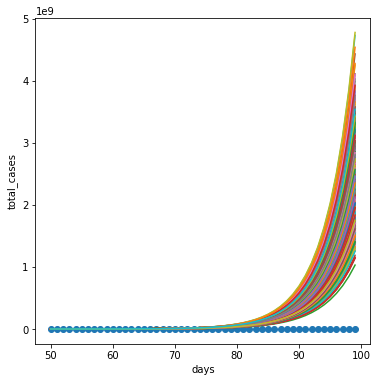

In [155]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('days')
ax.set_ylabel('total_cases')
ax.scatter(X_test, y_test)
for i in range(SAMPL):
    ax.plot(X_test, np.exp(XX@tst[i].reshape((-1,1))))
plt.show()

Весьма удручающие предсказания

In [156]:
#средние по выборке веса
np.array(tst).mean(axis=0)

array([1.26879563, 0.20459895])

In [157]:
#среднее число заболеваний в соответствии с предсказаниями
np.exp(XX@np.array(tst).mean(axis=0).reshape((-1,1)))[-1][0]

2227380035.3198028

2 миллиарда:) не слишком здорово, учитывая, что в России 150 млн человек, 

In [158]:
def distr(date, weights):
    tot_cases = []
    arg = test[test['date'] == date]['index']
    for i in range(len(weights)):
        tot_cases.append(np.exp(weights[i][0] + weights[i][1] * arg))
    tot_cases = np.array(tot_cases).reshape((-1,1))
    df = pd.DataFrame(tot_cases)
    df.columns = ['total_cases']
    sns.displot(df['total_cases'], bins=10)
        
    

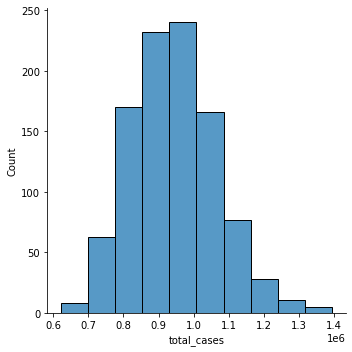

In [159]:
distr('2020-05-01', tst)

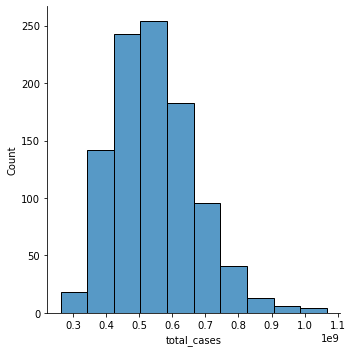

In [160]:
distr('2020-06-01', tst)

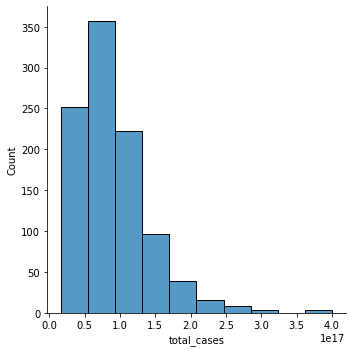

In [161]:
distr('2020-09-01', tst)

к 1 сентябра где-то 0.5 * 10**17

## 3

$ln(y') = w0 + w1 * t + w2 * t**2 + \epsilon$ <br>
$\epsilon = Norm(0, \sigma ^2)$

численное дифференирование: <br>
$f'(x_0) = \frac{-3f_0 + 4f_1 - f_2}{2h}$ <br>
$f'(x_1) = \frac{f_2 - f_0}{2h}$ <br>
$f'(x_2) = \frac{3f_2 - 4f_1 + f_0}{2h}$

In [162]:
train.head()

,index,date,total_cases,new_cases
0,0,2020-03-01,2.0,0.0
1,1,2020-03-02,3.0,1.0
2,2,2020-03-03,3.0,0.0
3,3,2020-03-04,3.0,0.0
4,4,2020-03-05,4.0,1.0


In [163]:
temp = np.array(train['total_cases'])

в качестве производной можно брать данные из столбца new_cases, но я решил использовать формулу для апроксимации производной с более высокой точностью, а не просто (f(x + h) - f(x) / h)

In [164]:
dif_train = temp.copy()
dif_train = (dif_train[2::] - dif_train[0:-2]) / 2
dif_train = np.hstack((0, dif_train, 0))
dif_train[0] = (-3 * temp[0] + 4 * temp[1] - temp[2]) / 2
dif_train[-1] = (temp[-3] - 4 * temp[-2] + 3 * temp[-1]) / 2

In [165]:
# замена нуля на что-нибудь маленькое
dif_train[dif_train == 0] = 0.1

In [166]:
y_train2 = np.log(dif_train).reshape((-1, 1))

In [167]:
X_train2 = np.hstack((X_train, X_train**2))

X_train - просто дни (0, 1, 2, 3 и тд)
X_train2 - дни и квадраты ((0,0), (1,1),(2,4) и тд)

In [168]:
#так же моделька
model2 = Ridge(alpha=lambd)
model2.fit(X_train2, y_train2)

Ridge(alpha=0.01)

In [169]:
#подинтегральная фукция
def func(t, weights):
    return np.exp(weights[0] + weights[1] * t + weights[2] * t**2)

In [170]:
#предсказание через модель
def pred(model, t):
    weights = np.hstack((model.intercept_, model.coef_.reshape(-1)))
    ans = [0]
    i_pred = -np.inf
    for i in t:
        ans.append(ans[-1] + quad(func, i_pred, i, args=(weights))[0])
        i_pred = i
    del ans[0]
    return ans

In [171]:
#предсказание по известным весам
def pred_w(weights, t):
    ans = [0]
    i_pred = -np.inf
    for i in t:
        ans.append(ans[-1] + quad(func, i_pred, i, args=(weights))[0])
        i_pred = i
    del ans[0]
    return ans

График обученной модели выглядит более правдоподобным

In [172]:
ans = pred(model2, X_train)

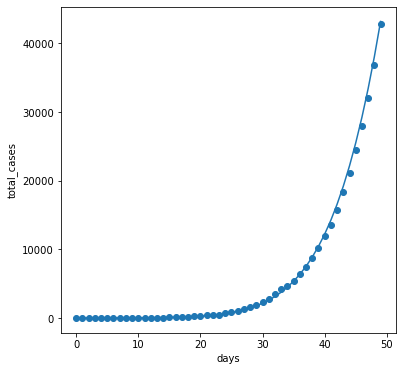

In [173]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_train, np.exp(y_train))
ax.plot(X_train, ans)
ax.set_xlabel('days')
ax.set_ylabel('total_cases')
plt.show()

In [174]:
lambd

0.01

In [175]:
#оценка дисперсии шума в данных
sigma2 = np.std(y_train2 - model2.predict(X_train2))

In [176]:
sigma2

0.5028848695837589

In [177]:
alpha2 = sigma2**2 / lambd

In [178]:
alpha2

25.289319205627418

In [179]:
#параметры апостериорного распределения
X2 = np.hstack((np.ones((X_train2.shape[0], 1)), X_train2))
apost_covm2 = np.linalg.inv(np.eye(3) / alpha2 + X2.T @ X2 / sigma2**2)
apost_mean2 = apost_covm2 @ X2.T @ y_train2 / sigma2**2

In [180]:
SAMP = 1000

In [181]:
#сэмплируем веса из распределения
tst2 = []
for i in range(SAMP):
    tst2.append(np.random.multivariate_normal(mean=apost_mean2.reshape(-1), cov=apost_covm2))

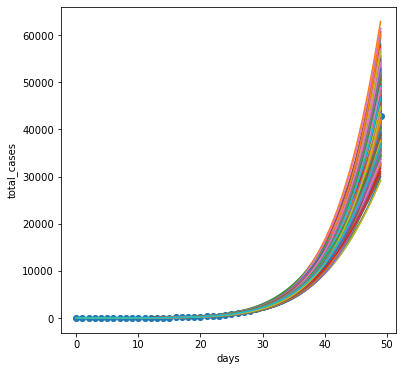

In [182]:
#рисуем
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_train, np.exp(y_train))
ax.set_xlabel('days')
ax.set_ylabel('total_cases')
for i in range(SAMP):
    ax.plot(X_train, pred_w(tst2[i], X_train.flatten()))
plt.show()

а что с тестом?

In [183]:
X_test = np.array(test.iloc[0:250]['index']).reshape((-1, 1))
y_test = np.array(test.iloc[0:250]['total_cases']).reshape((-1, 1))

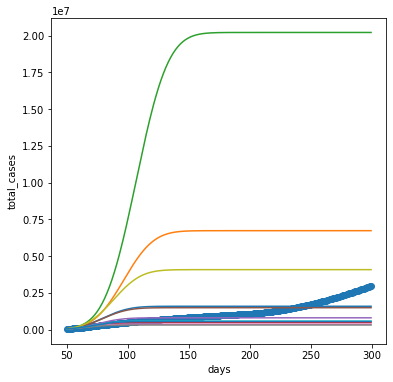

In [184]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_test, y_test)
ax.set_xlabel('days')
ax.set_ylabel('total_cases')
for i in range(SAMP // 100 + 1):
    ax.plot(X_test, pred_w(tst2[i], X_test.flatten()))
plt.show()

как мы видим, сигмоидальная зависимость тоже не очень хорошо описывает данные, но дела намного лучше, чем с экспоненциальной зависимостью, которая просто уходит в бесконечность. Тут хотя бы можно оценить верхнюю границу

Я думаю, что в действительности тут какая-то кусочная зависимость, видно "вторую волну заболеваний", которая также должна иметь какой-то сигмоидальный вид

посмотрим максимальное количество заболеваний (интеграл от -inf до inf) исходя из сэмплированных данных

In [185]:
def full_integ(weights):
    ans = []
    ans.append(quad(func, -np.inf, np.inf, args=(weights))[0])
    return ans
    

In [186]:
max_cases = []
for i in range(SAMP):
    max_cases.append(full_integ(tst2[i]))
max_cases = np.array(max_cases)

In [187]:
np.histogram(np.array(max_cases))

(array([973,  12,   7,   2,   2,   0,   1,   1,   1,   1], dtype=int64),
 array([1.09784189e+05, 1.16991751e+07, 2.32885661e+07, 3.48779570e+07,
        4.64673480e+07, 5.80567389e+07, 6.96461298e+07, 8.12355208e+07,
        9.28249117e+07, 1.04414303e+08, 1.16003694e+08]))

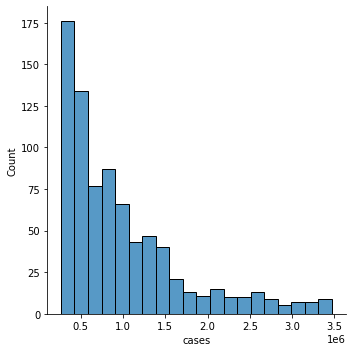

In [188]:
# немного обрезал края, так как большие значения портят гистограмму и становится ничего непонятно
# выше вывел распределение гистограммы без ограничений (очень большие промежутки)
temp = pd.DataFrame(max_cases[(max_cases < np.percentile(max_cases, 90)) & (max_cases > np.percentile(max_cases, 10))])
temp.columns = ['cases']
sns.displot(temp['cases'], bins=20)

In [189]:
np.percentile(max_cases, [10,90]).round(0)

array([ 264379., 3471814.])

Получается, что в оптимистичном сценарии будет 260 000 заболеваний, а в пессимистичном 3.5 миллиона

Выдержка из интернета: "На 22 февраля 2021 в России зафиксировано 4 164 726 случаев заражения коронавирусом Covid-19."

Всё по худшему сценарию :)

на самом деле, зависимость, которую мы пытаемся обучить не совсем соответствует действительности, поэтому в реальности дела обстоят похуже

В общем - жизнь сложная штука, и весьма сложно моделировать что-то, так как всё может резко поменяться. В реальности всё может оказаться намного хуже, чем на компьютере. Я думаю, что ориентироваться нужно на худшие предсказания и действовать в соответствии с ними, тогда можно быть готовым практически ко всему.